In [13]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import sys

K = 3   # number of centroids to compute
numClusters = 3 # actual number of clusters to generate
ptsPerCluster = 40  # number of points per actual cluster
xCenterBounds = (-1, 1) # limits within which to place actual cluster centers

In [31]:
# Randomly place cluster centers within the span of xCenterBounds.
centers = np.random.random_sample((numClusters,))
centers = centers * (xCenterBounds[1] - xCenterBounds[0]) + xCenterBounds[0]

# Initialize array of data points.
points = np.zeros((numClusters * ptsPerCluster,))

# Normally distribute ptsPerCluster points around each center.
stDev = 0.15
for i in range(numClusters):
    points[i*ptsPerCluster:(i+1)*ptsPerCluster] = (stDev * np.random.randn(ptsPerCluster) + centers[i])

In [34]:
points

array([ 0.80620235,  0.87191791,  0.35178854,  0.47258454,  0.66897667,
        0.57681411,  0.65607773,  0.49148553,  0.50977189,  0.51973545,
        0.77488149,  0.55501868,  0.77715027,  0.94374776,  0.79467148,
        0.78872938,  0.79169857,  0.82223969,  0.98344952,  0.65775547,
        0.52360065,  0.64837013,  0.63434691,  0.6840296 ,  0.69296484,
        0.61839046,  0.9517058 ,  0.21217959,  0.75063573,  0.65039966,
        0.4781838 ,  0.75584458,  0.81684683,  0.59062976,  0.52595489,
        0.47403474,  0.25517958,  0.49098232,  0.73596868,  0.63746959,
       -0.75270425, -0.43185686, -0.49162266, -0.62318013, -0.78068019,
       -0.55121253, -0.64610879, -0.60893306, -0.77169293, -0.4961674 ,
       -0.61282957, -0.94739329, -0.68200524, -0.84972928, -0.42457435,
       -0.84305856, -0.84690389, -0.79479147, -0.63944308, -0.62430035,
       -0.86617301, -0.49108874, -0.74539681, -0.66652314, -0.51303293,
       -0.61042835, -0.51325673, -0.62832097, -0.83335171, -0.71

In [36]:
# Randomly select K points as the initial centroid locations.
centroids = np.zeros((K,))
indices = []
while len(indices) < K:
    index = np.random.randint(0, numClusters * ptsPerCluster)
    if not index in indices:
        indices.append(index)
centroids = points[indices]

# Assign each point to its nearest centroid. Store this in classifications,
# where each element will be an int from 0 to K-1.
classifications = np.zeros((points.shape[0],), dtype=np.int)
def assignPointsToCentroids():
    for i in range(points.shape[0]):
        smallestDistance = 0
        for k in range(K):
            distance = abs(points[i] - centroids[k])
            if k == 0:
                smallestDistance = distance
                classifications[i] = k
            elif distance < smallestDistance:
                smallestDistance = distance
                classifications[i] = k

assignPointsToCentroids()

In [21]:
# Define a function to recalculate the centroid of a cluster.
def recalcCentroids():
    for k in range(K):
        if sum(classifications == k) > 0:
            centroids[k] = sum(points[classifications == k]) / sum(classifications == k)

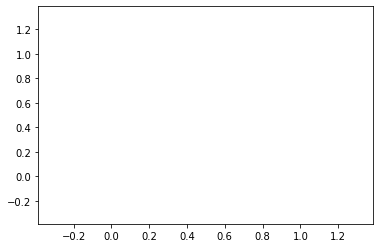

In [37]:
# Generate a unique color for each of the K clusters using the HSV color scheme.
# Simultaneously, initialize matplotlib line objects for each centroid and cluster.
hues = np.linspace(0, 1, K+1)[:-1]

fig, ax = plt.subplots()
clusterPointsList = []
centroidPointsList = []
for k in range(K):
    clusterColor = tuple(colorsys.hsv_to_rgb(hues[k], 0.8, 0.8))

    clusterLineObj, = ax.plot([], [], ls='None', marker='x', color=clusterColor)
    clusterPointsList.append(clusterLineObj)

    centroidLineObj, = ax.plot([], [], ls='None', marker='o', 
        markeredgecolor='k', color=clusterColor)
    centroidPointsList.append(centroidLineObj)
iterText = ax.annotate('', xy=(0.01, 0.01), xycoords='axes fraction')

In [38]:
# Define a function to update the plot.
def updatePlot(iteration):
    for k in range(K):
        xDataNew = points[classifications == k]
        clusterPointsList[k].set_data(xDataNew, np.zeros((len(xDataNew),)))
        centroidPointsList[k].set_data(centroids[k], 0)
    iterText.set_text('i = {:d}'.format(iteration))
    plt.savefig('./{:d}.png'.format(iteration))
    plt.pause(0.5)

dataRange = np.amax(points) - np.amin(points)
ax.set_xlim(np.amin(points) - 0.05*dataRange, np.amax(points) + 0.05*dataRange)
ax.set_ylim(-1, 1)
iteration = 0
updatePlot(iteration)
plt.ion()
plt.show()
plt.savefig('fig.png')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Execute and animate the algorithm with a while loop. Note that this is not the
# best way to animate a matplotlib plot--the matplotlib animation module should be
# used instead, but we will use a while loop here for simplicity.
lastCentroids = centroids + 1
while not np.array_equal(centroids, lastCentroids):
    lastCentroids = np.copy(centroids)
    recalcCentroids()
    assignPointsToCentroids()
    iteration += 1
    updatePlot(iteration)

pythonMajorVersion = sys.version_info[0]
if pythonMajorVersion < 3:
    raw_input("Press Enter to continue.")
else:
    input("Press Enter to continue.")